In [2]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import RXGate, RZZGate

In [6]:
def create_parallel_circuit(num_layers, num_size):
    qc = QuantumCircuit(num_size)
    angle_rzz = 3.141592653589793/6

    for i in range(num_layers):
        # Apply RX gate with angle 0 to each qubit
        for j in range(num_size):
            qc.rx(0, j)
        # barrier to separate the gates
        qc.barrier()
        # Apply RZZ gate with angle 0 between specific pairs of qubits
        for j in range(0, num_size - 1, 2):
            qc.rzz(angle_rzz, j, j+1)

        # Apply RZZ gate with angle 0 again between the same pairs, staggered across the circuit's timeline
        for j in range(1, num_size - 1, 2):
            qc.rzz(angle_rzz, j, j+1)

        # Apply RZZ gate with angle 0 on the last pair of qubits
        qc.rzz(angle_rzz, 0, num_size-1)
        # barrier to separate the gates
        qc.barrier()
    return qc

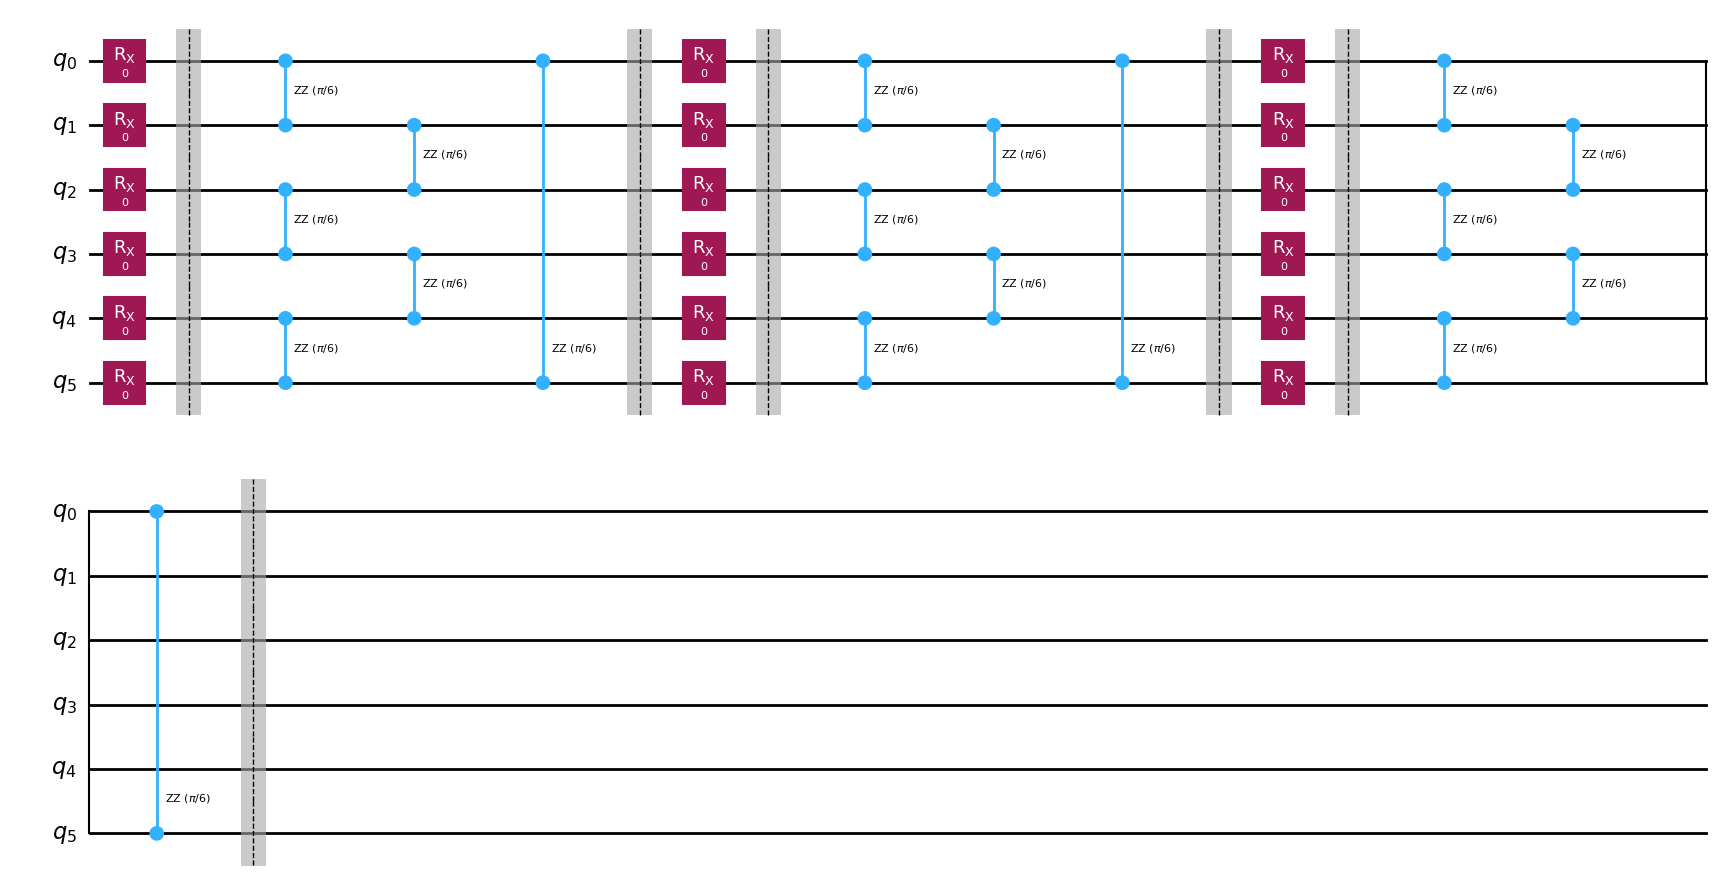

In [5]:

num_layers = 3
num_size = 6

qc = QuantumCircuit(num_size)
angle_rzz = 3.141592653589793/6

for i in range(num_layers):
    # Apply RX gate with angle 0 to each qubit
    for j in range(num_size):
        qc.rx(0, j)
    # barrier to separate the gates
    qc.barrier()
    # Apply RZZ gate with angle 0 between specific pairs of qubits
    for j in range(0, num_size - 1, 2):
        qc.rzz(angle_rzz, j, j+1)

    # Apply RZZ gate with angle 0 again between the same pairs, staggered across the circuit's timeline
    for j in range(1, num_size - 1, 2):
        qc.rzz(angle_rzz, j, j+1)

    # Apply RZZ gate with angle 0 on the last pair of qubits
    qc.rzz(angle_rzz, 0, num_size-1)
    # barrier to separate the gates
    qc.barrier()


qc.draw(output='mpl')


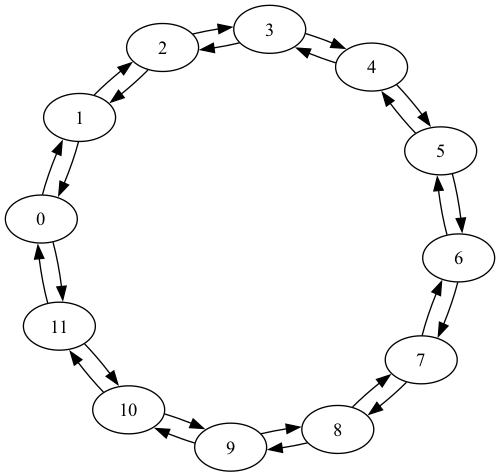

In [3]:
# First, ensure you have Qiskit installed:
# pip install qiskit

from qiskit.transpiler import CouplingMap
import matplotlib.pyplot as plt

# Define the edges based on the heavy hex design
# This is a simplified version for demonstration; adjust according to your specific design

# Create the CouplingMap object
coupling_map = CouplingMap.from_ring(12)

# Visualize the coupling map
coupling_map.draw()

In [4]:
initial_layout = [1,2,5,6,9,10]

In [5]:
from qiskit import transpile

/Users/henryzou/.venvs/qiskit-dev/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/henryzou/.venvs/qiskit-dev/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


165


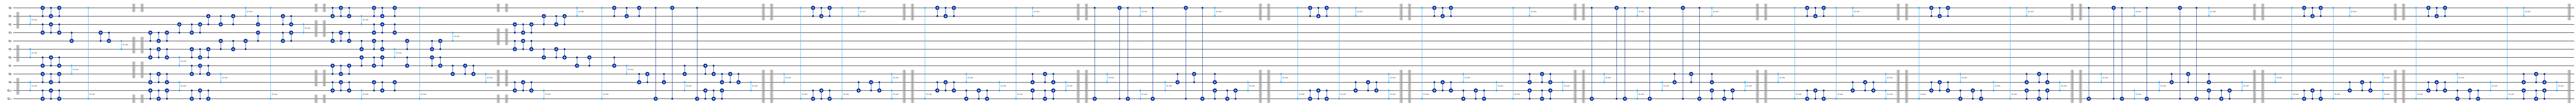

In [6]:
qc_tr = transpile(qc, coupling_map=coupling_map, initial_layout=initial_layout, optimization_level=3)
qc_tr = qc_tr.decompose(["swap"])
print(qc_tr.depth())
qc_tr.draw('mpl', fold=-1)

In [7]:
from qiskit.transpiler.passes.routing.sabre_depth import SabreSwap
from qiskit.transpiler.passes import SetLayout, FullAncillaAllocation, EnlargeWithAncilla, ApplyLayout, SabreLayout
from qiskit.transpiler import PassManager


In [8]:
pm = PassManager([
    SetLayout(initial_layout),
    FullAncillaAllocation(coupling_map),
    EnlargeWithAncilla(),
    ApplyLayout(),
    SabreSwap(coupling_map)
])

132


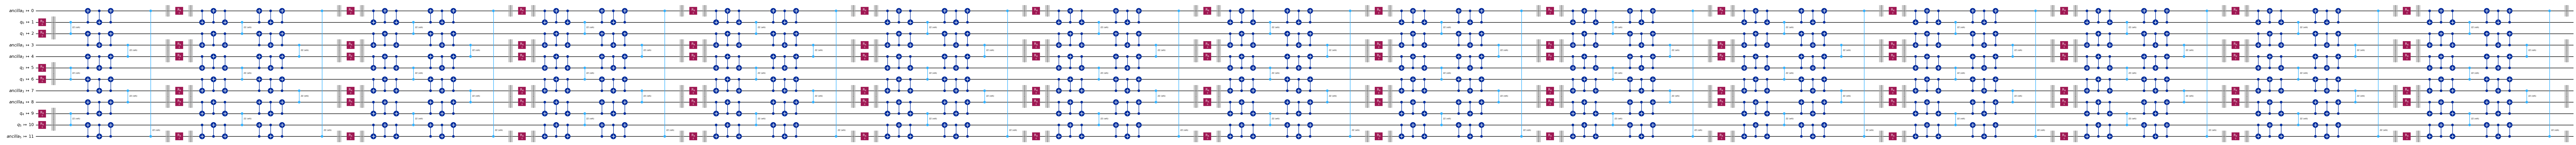

In [9]:
qc_tr_sabre = pm.run(qc)
print(qc_tr_sabre.depth())
qc_tr_sabre.draw('mpl', fold=-1)

In [10]:
pm_sabre = PassManager([
    SabreLayout(coupling_map= coupling_map, routing_pass = SabreSwap(coupling_map)),
    FullAncillaAllocation(coupling_map),
    EnlargeWithAncilla(),
    ApplyLayout(),
    SabreSwap(coupling_map)
])

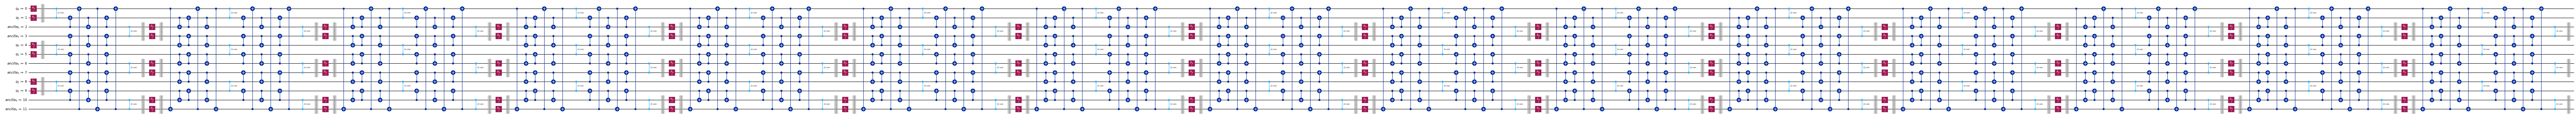

In [11]:
qc_tr_sabre_sabre = pm_sabre.run(qc)
qc_tr_sabre_sabre.draw('mpl', fold=-1)